In [1]:
import pandas as pd    
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv('data 3.csv')

In [3]:
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
df.describe().transpose()

count      mean  \
Bankrupt?                                           6819.0  0.032263   
 ROA(C) before interest and depreciation before...  6819.0  0.505180   
 ROA(A) before interest and % after tax             6819.0  0.558625   
 ROA(B) before interest and depreciation after tax  6819.0  0.553589   
 Operating Gross Margin                             6819.0  0.607948   
...                                                    ...       ...   
 Liability to Equity                                6819.0  0.280365   
 Degree of Financial Leverage (DFL)                 6819.0  0.027541   
 Interest Coverage Ratio (Interest expense to E...  6819.0  0.565358   
 Net Income Flag                                    6819.0  1.000000   
 Equity to Liability                                6819.0  0.047578   

                                                         std  min       25%  \
Bankrupt?                                           0.176710  0.0  0.000000   
 ROA(C) before interest and depreciation before...  0.060686  0.0  0.476527   
 ROA(A) before interest and % after tax             0.065620  0.0  0.535543   
 ROA(B) before interest and depreciation after tax  0.061595  0.0  0.527277   
 Operating Gross Margin                             0.016934  0.0  0.600445   
...                                                      ...  ...       ...   
 Liability to Equity                                0.014463  0.0  0.276944   
 Degree of Financial Leverage (DFL)                 0.015668  0.0  0.026791   
 Interest Coverage Ratio (Interest expense to E...  0.013214  0.0  0.565158   
 Net Income Flag                                    0.000000  1.0  1.000000   
 Equity to Liability                                0.050014  0.0  0.024477   

                                                         50%       75%  max  
Bankrupt?                                           0.000000  0.000000  1.0  
 ROA(C) before interest and depreciation before...  0.502706  0.535563  1.0  
 ROA(A) before interest and % after tax             0.559802  0.589157  1.0  
 ROA(B) before interest and depreciation after tax  0.552278  0.584105  1.0  
 Operating Gross Margin                             0.605997  0.613914  1.0  
...                                                      ...       ...  ...  
 Liability to Equity                                0.278778  0.281449  1.0  
 Degree of Financial Leverage (DFL)                 0.026808  0.026913  1.0  
 Interest Coverage Ratio (Interest expense to E...  0.565252  0.565725  1.0  
 Net Income Flag                                    1.000000  1.000000  1.0  
 Equity to Liability                                0.033798  0.052838  1.0  

[96 rows x 8 columns]

In [6]:
df.duplicated().sum()

0

In [7]:
imbalanceCheck = df['Bankrupt?'].value_counts()
imbalanceCheck

0    6599
1     220
Name: Bankrupt?, dtype: int64

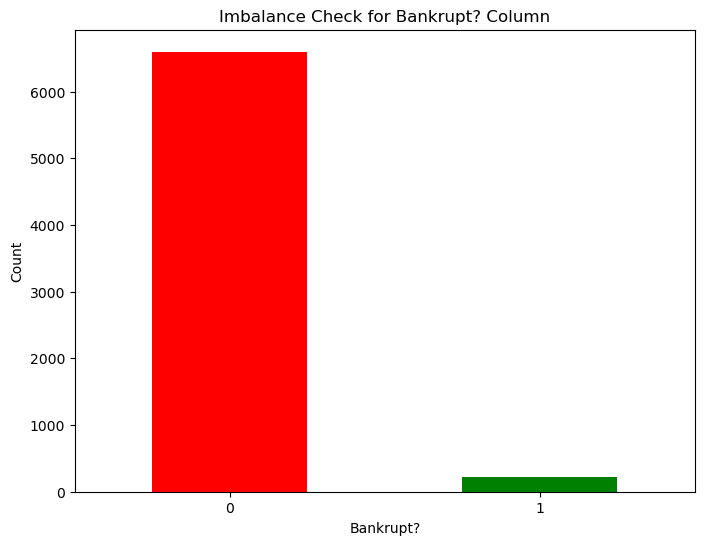

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(8, 6))
imbalanceCheck.plot(kind='bar', color=['red', 'green'])  
plt.title('Imbalance Check for Bankrupt? Column')
plt.xlabel('Bankrupt?')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


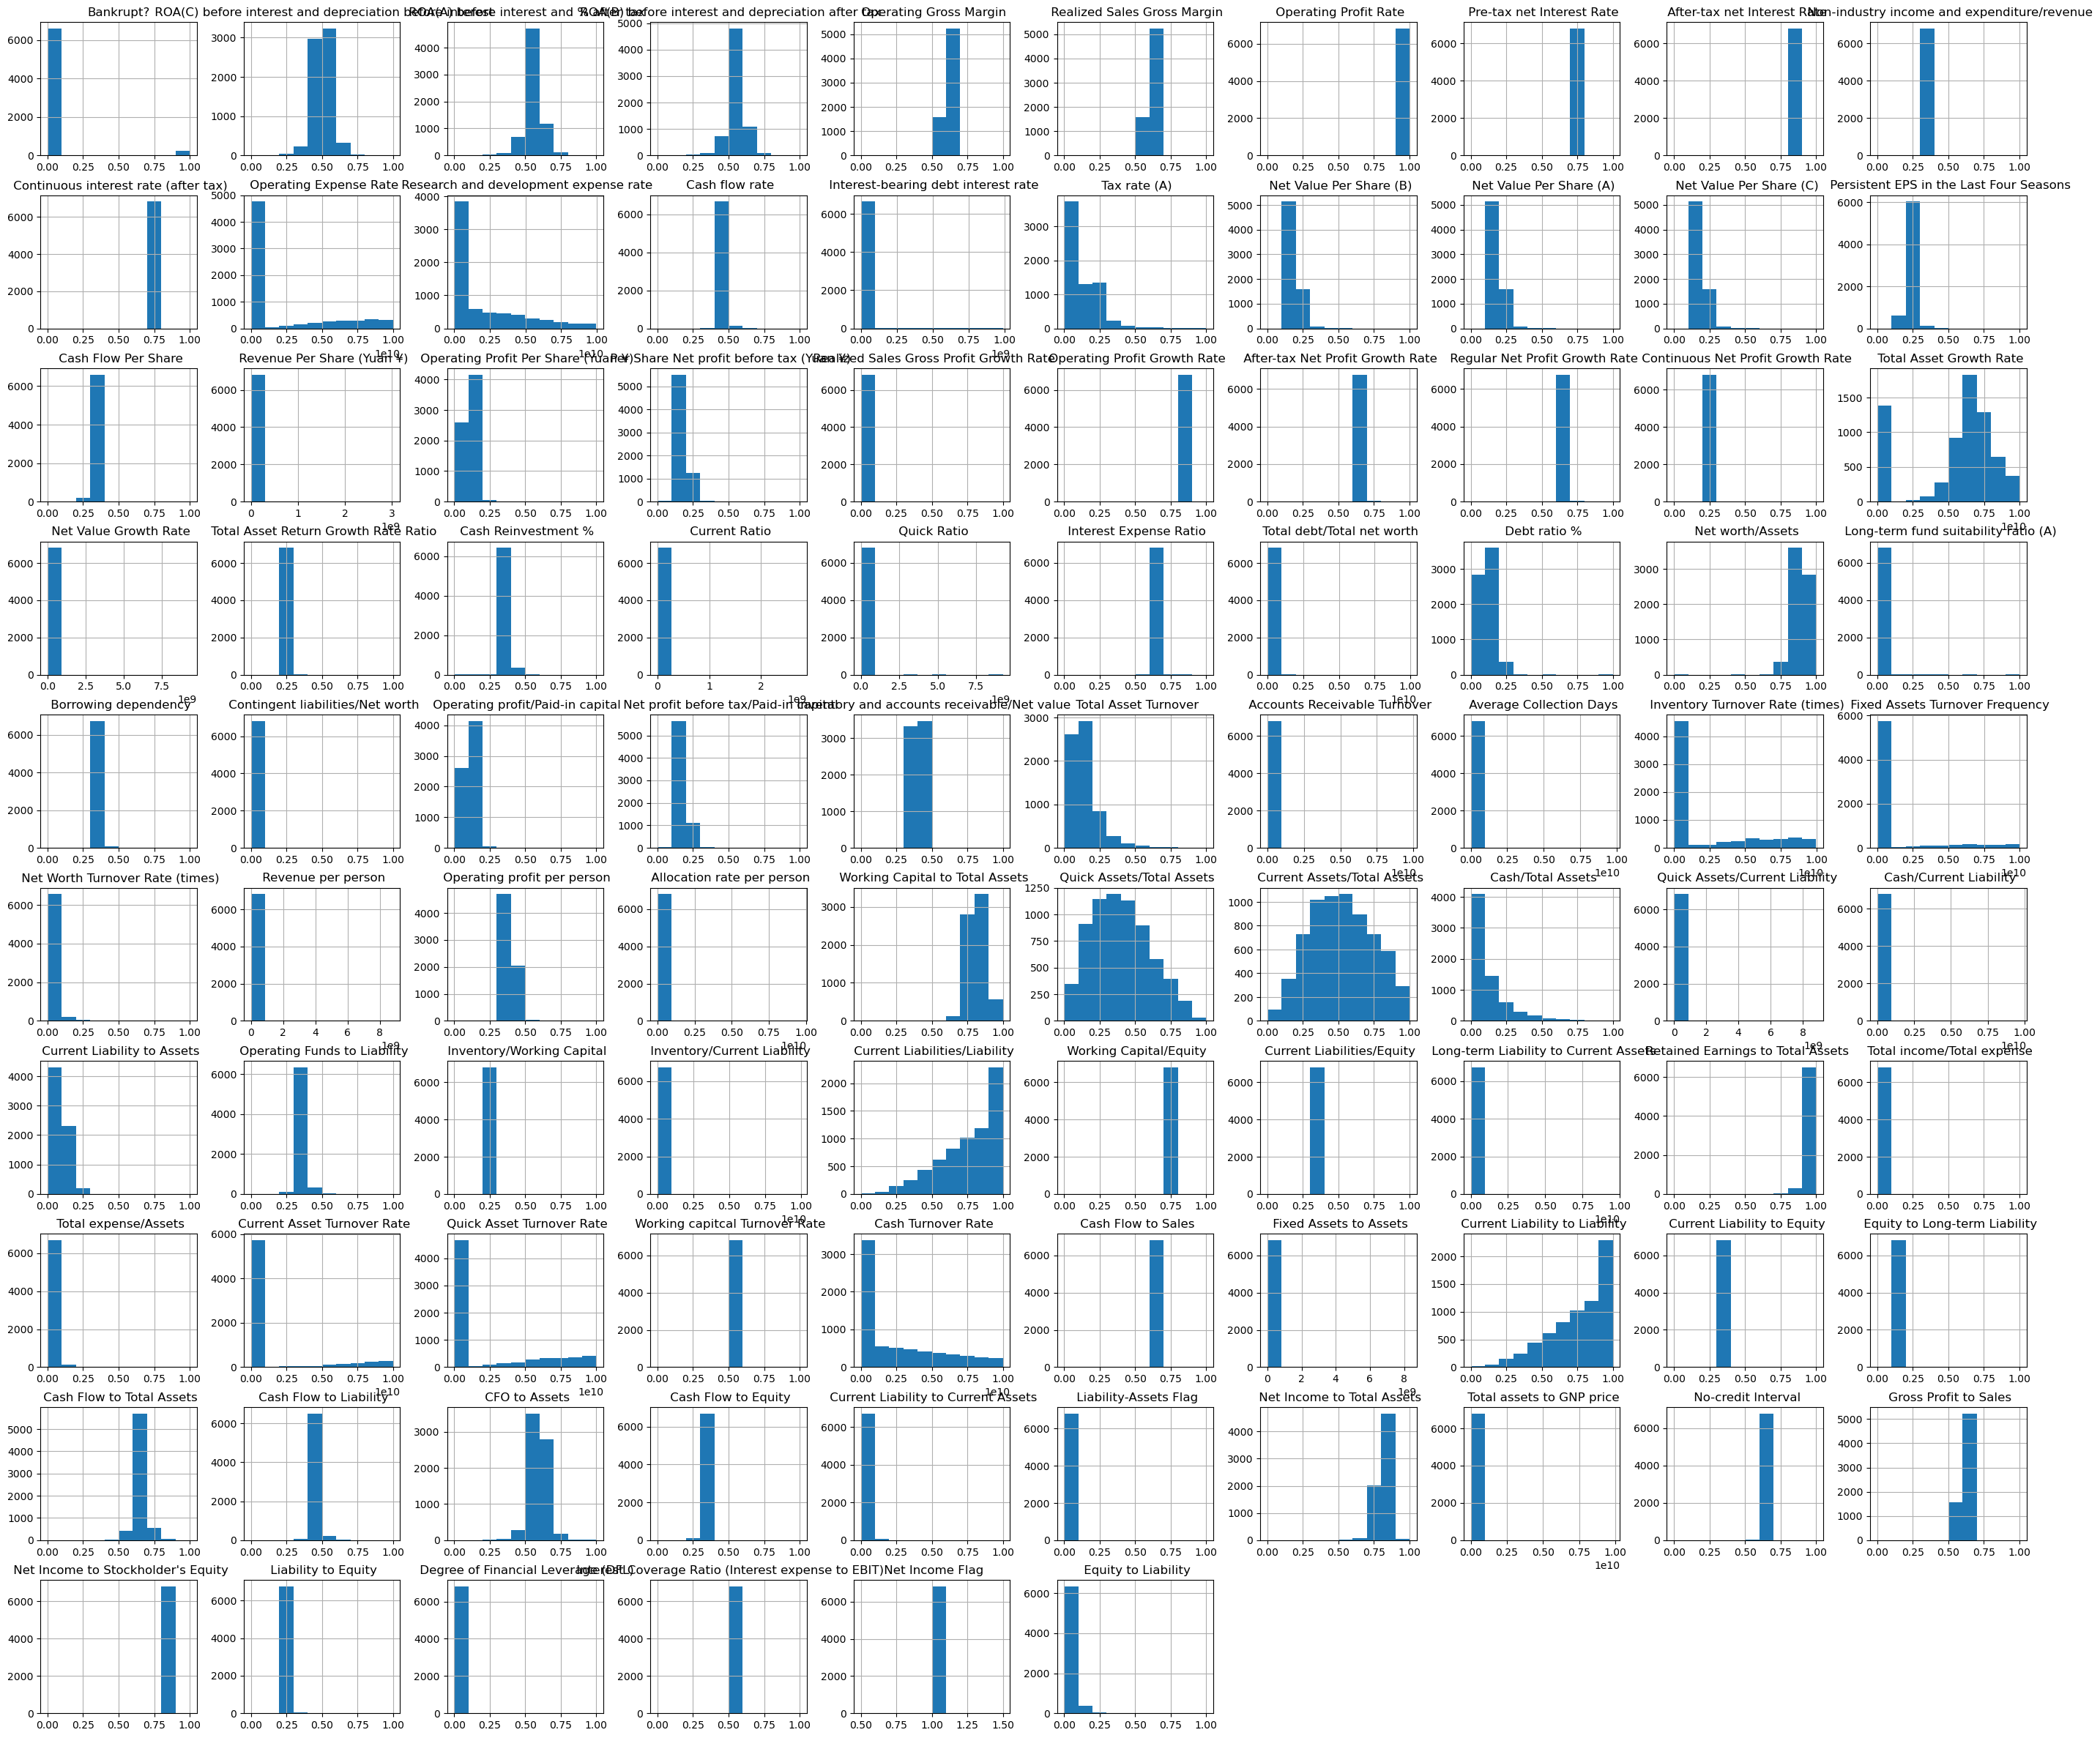

In [9]:
df.hist(figsize=(35, 30), bins=10)  
plt.show()


In [10]:
#Changing the bankruptcy column name to Bankrupt
df.rename(columns={'Bankrupt?': 'Bankrupt'},inplace = True)
#df

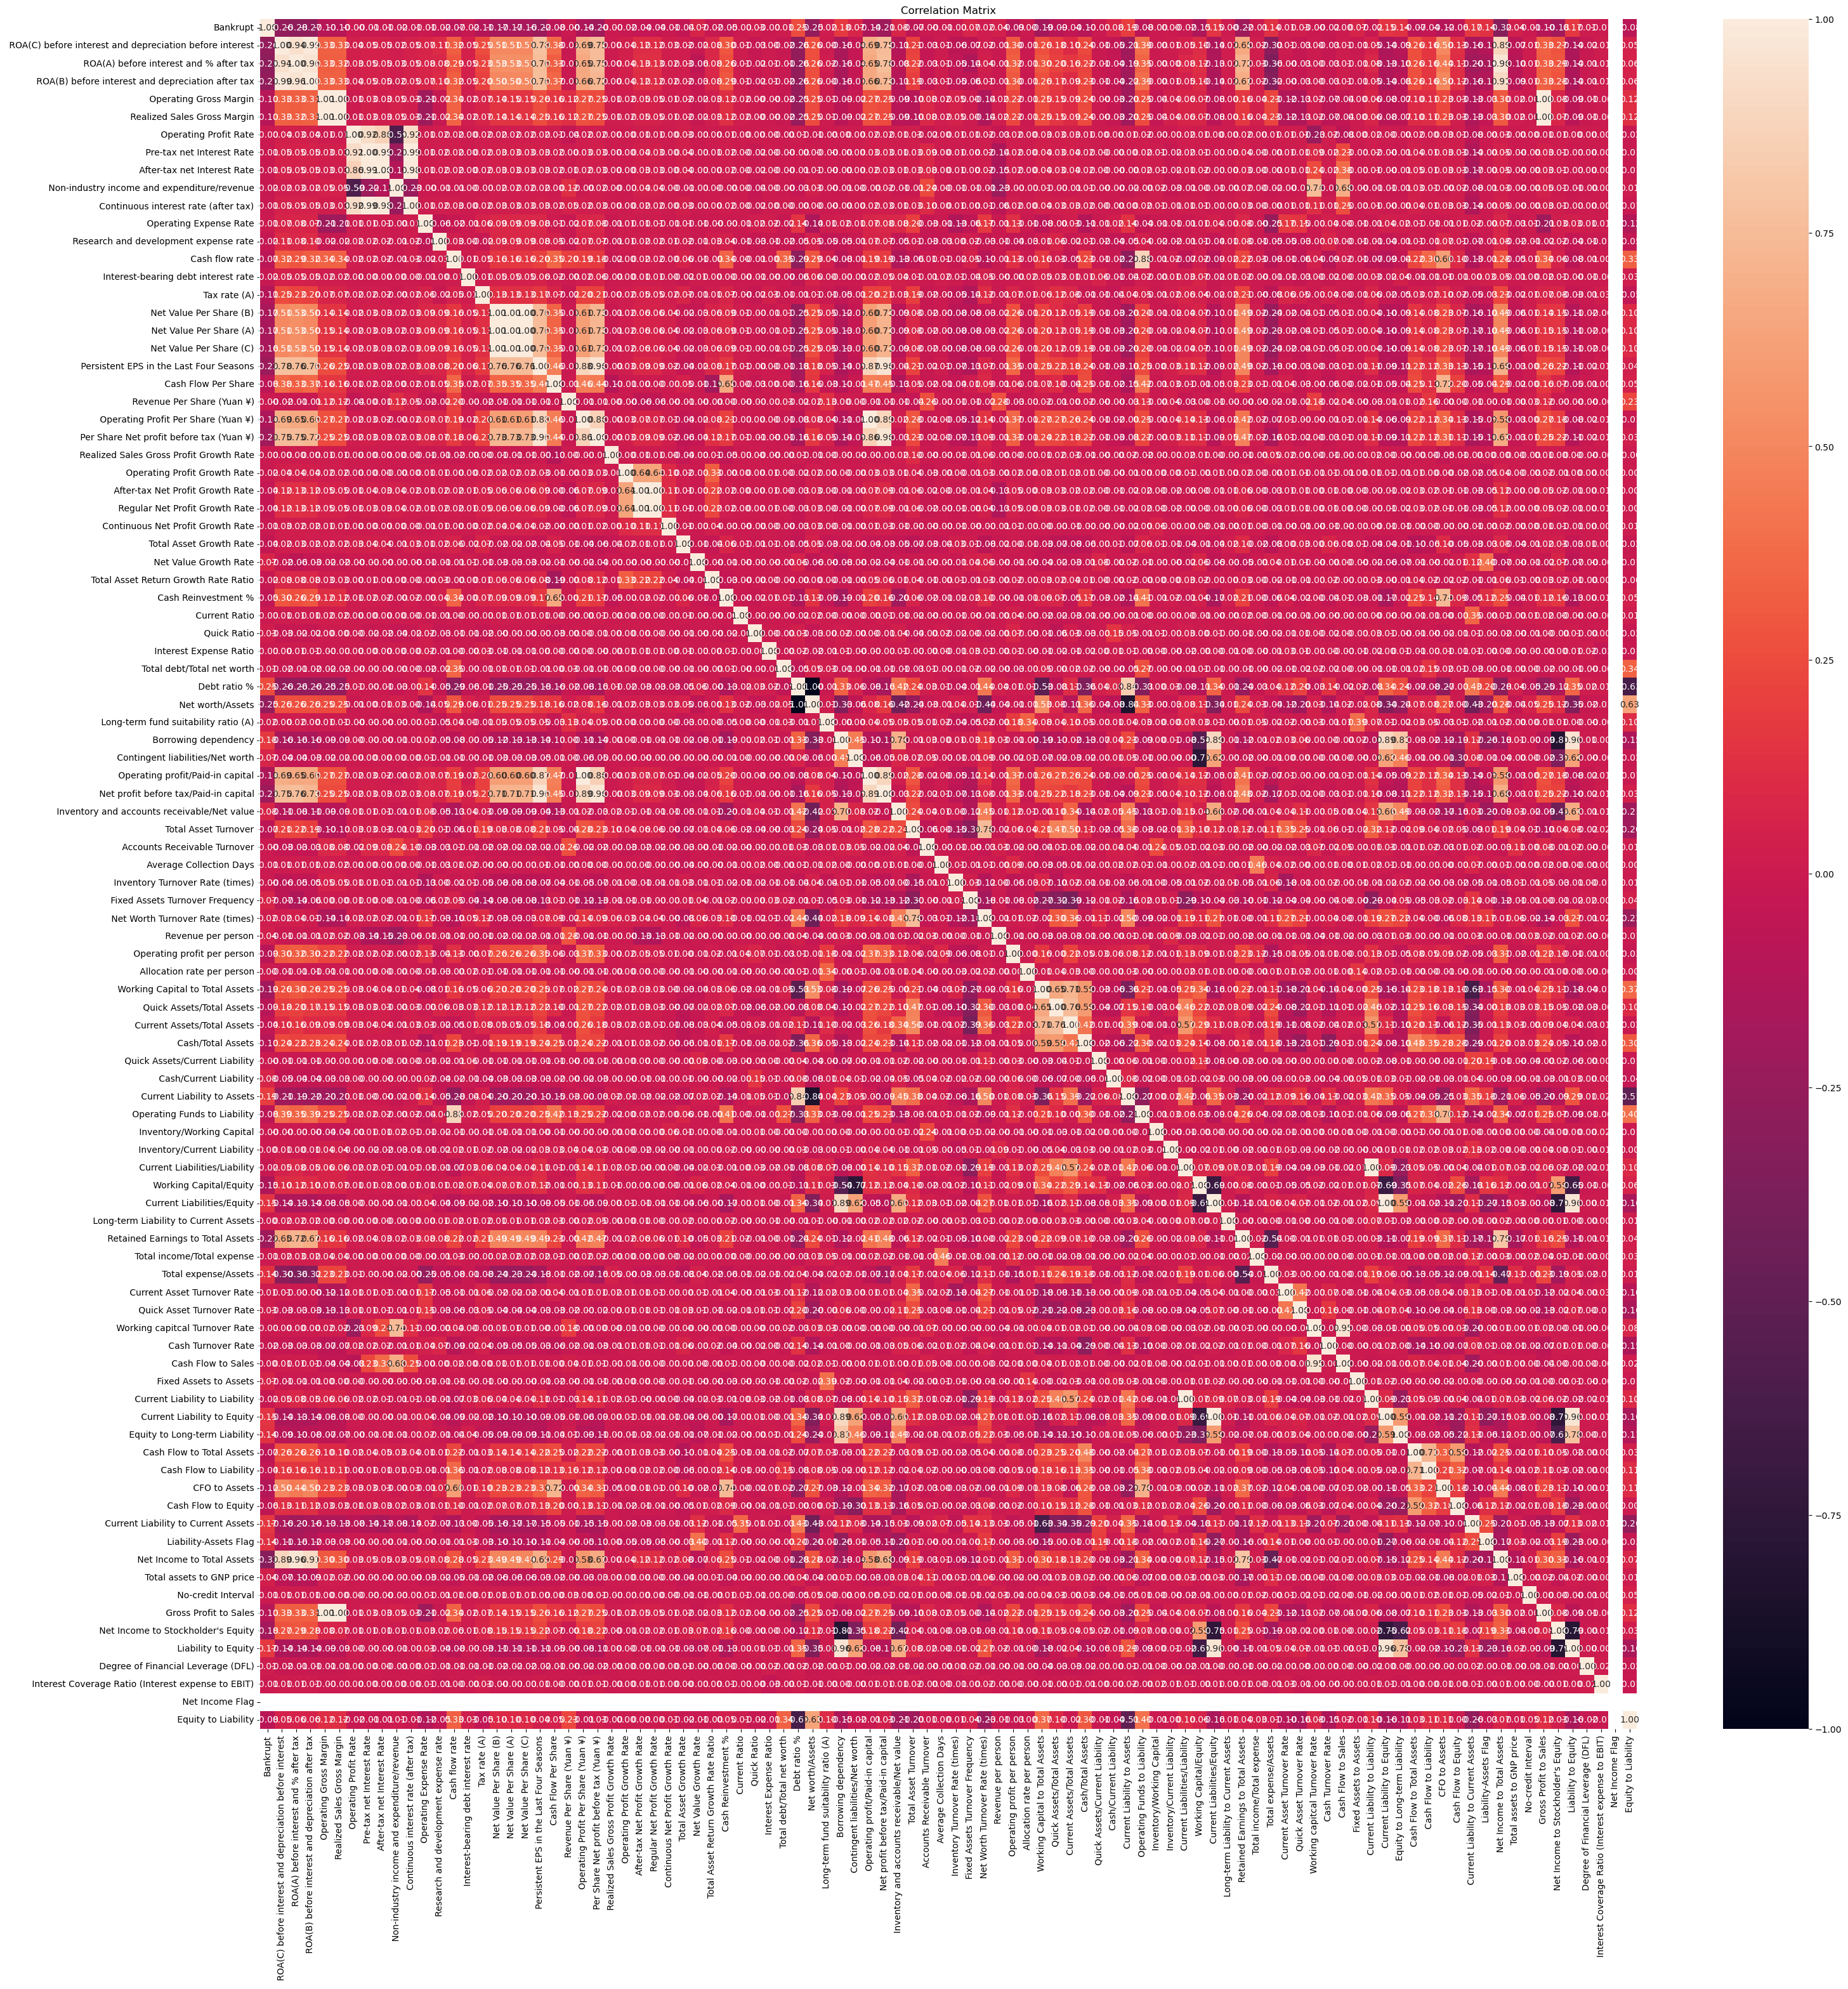

In [11]:
plt.figure(figsize=(35,35))
sns.heatmap(df.corr(),annot=True, fmt= ".2f")
plt.title("Correlation Matrix")
plt.show()

In [12]:
df.drop(df.columns[94], axis=1, inplace=True)

In [13]:
df.head()

Bankrupt   ROA(C) before interest and depreciation before interest  \
0         1                                           0.370594          
1         1                                           0.464291          
2         1                                           0.426071          
3         1                                           0.399844          
4         1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Liability-Assets Flag   Net Income to Total Assets  \
0  ...                       0                     0.716845   
1  ...                       0                     0.795297   
2  ...                       0                     0.774670   
3  ...                       0                     0.739555   
4  ...                       0                     0.795016   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    0.009219             0.622879                0.601453   
1                    0.008323             0.623652                0.610237   
2                    0.040003             0.623841                0.601449   
3                    0.003252             0.622929                0.583538   
4                    0.003878             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Equity to Liability  
0                                           0.564050                0.016469  
1                                           0.570175                0.020794  
2                             

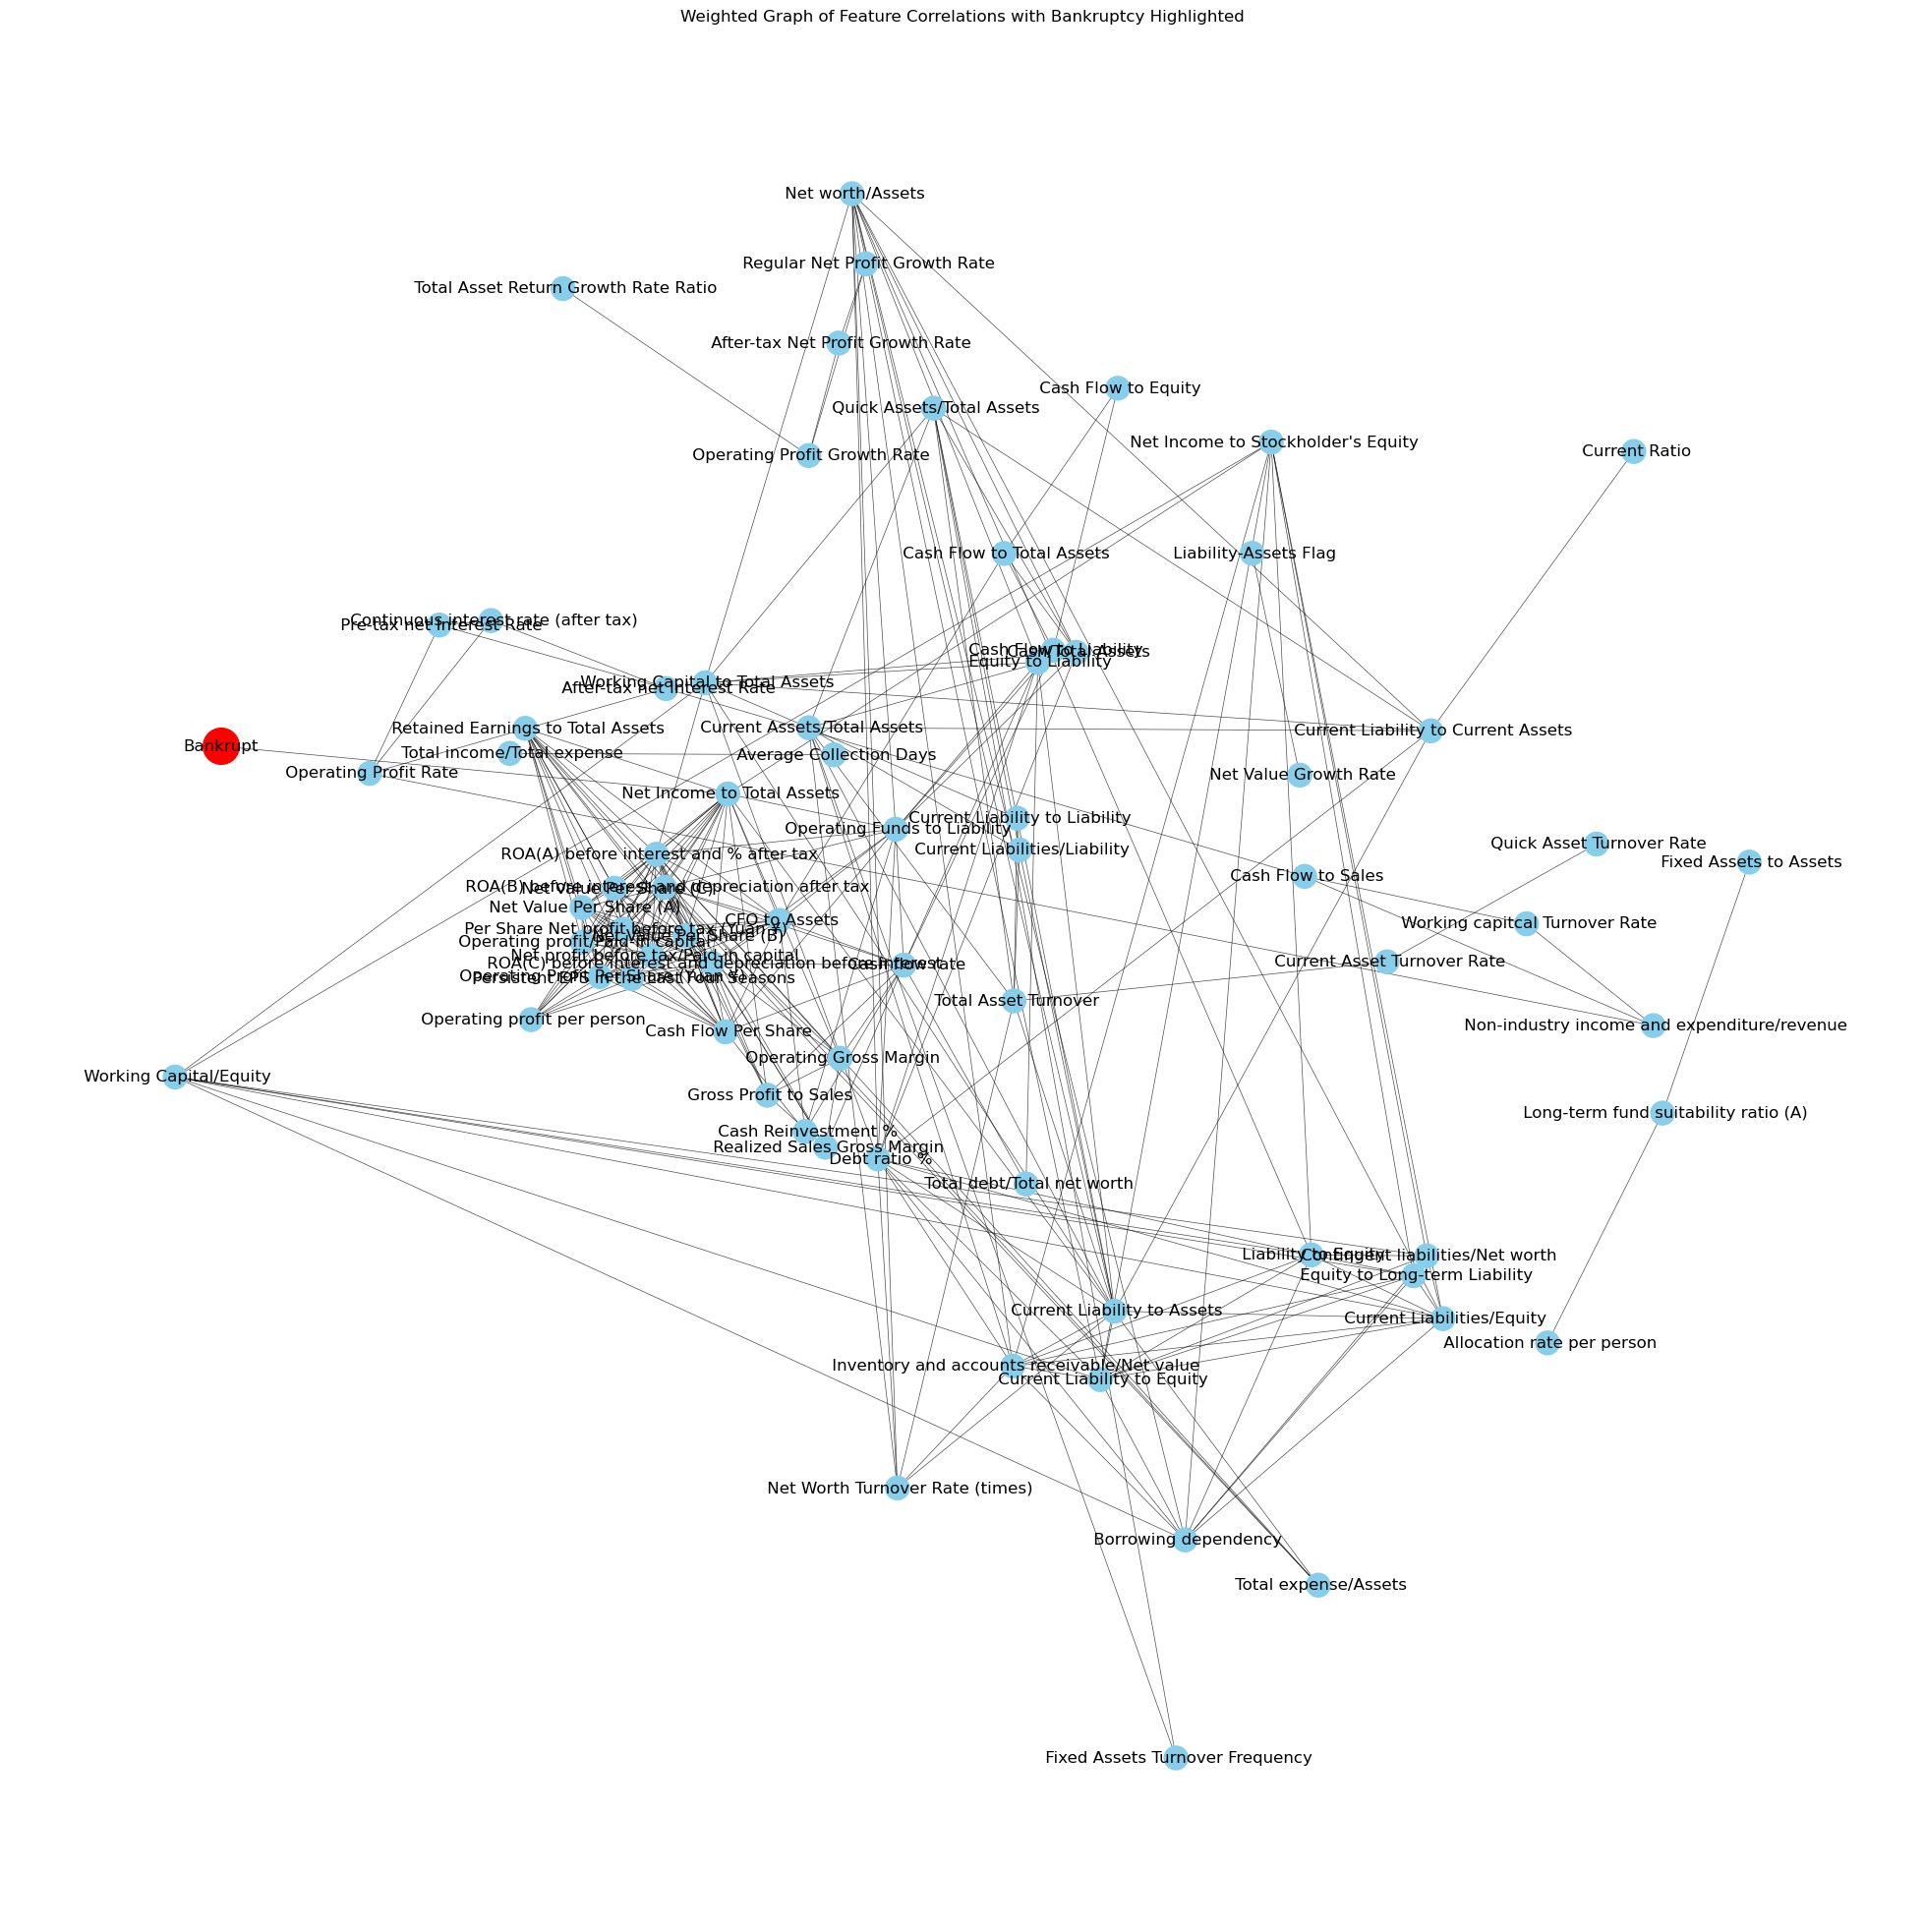

In [14]:
import networkx as nx

correlation_matrix = df.corr()

# Create a graph
G = nx.Graph()

# Add nodes (features) and edges with weights
for i, feature1 in enumerate(correlation_matrix.columns):
    for j, feature2 in enumerate(correlation_matrix.columns):
        if i < j and abs(correlation_matrix.iloc[i, j]) > 0.3:  # Adjust the threshold as needed
            G.add_edge(feature1, feature2, weight=correlation_matrix.iloc[i, j])

# Set node colors and sizes
node_colors = ['red' if node == 'Bankrupt' else 'skyblue' for node in G]
node_sizes = [700 if node == 'Bankrupt' else 300 for node in G]

# Position nodes using spring layout
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Draw the graph
plt.figure(figsize=(25, 25))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.7)

# Show the plot
plt.title("Weighted Graph of Feature Correlations with Bankruptcy Highlighted")
plt.axis('off')  # Hide the axes
plt.show()


In [15]:
target = "Bankrupt"
X = df.drop(columns=[target])
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6819, 94)
y shape: (6819,)


<h1>Scaling the data 

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming X and y are defined as per your provided code

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features (X) and then transform them
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Now X_scaled_df contains the normalized features


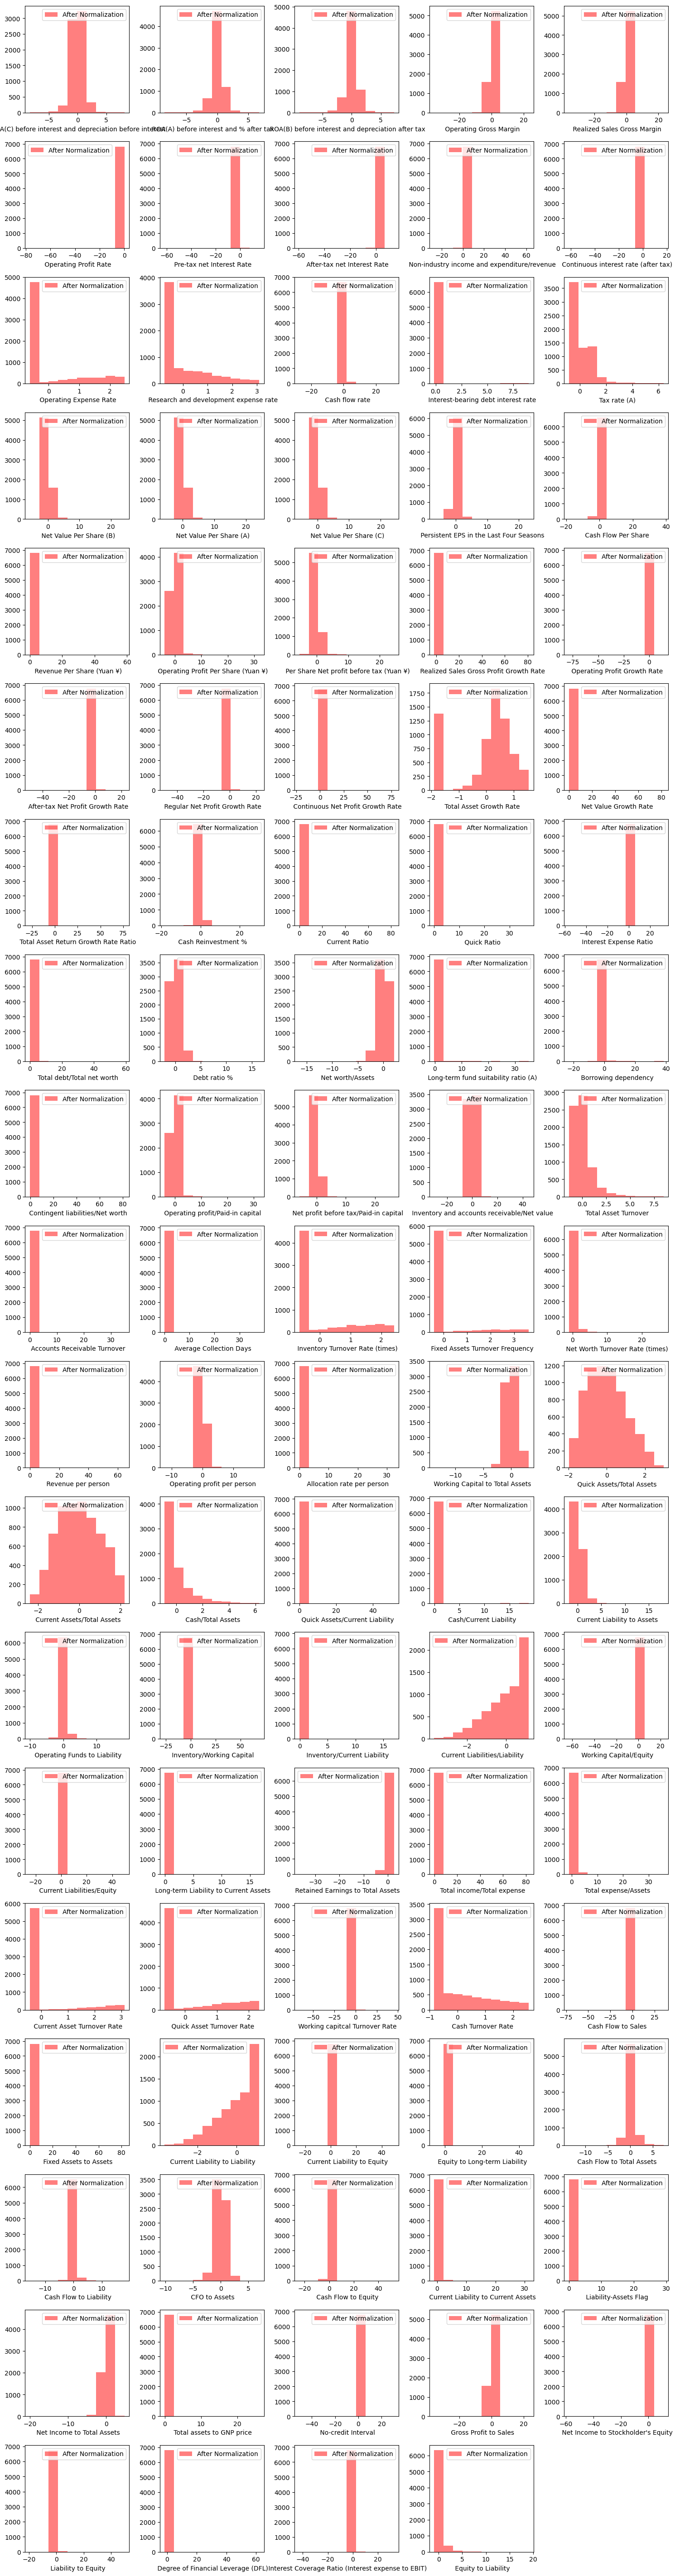

In [17]:
import matplotlib.pyplot as plt

n_features = len(X.columns)
n_cols = 5
n_rows = (n_features + n_cols - 1) // n_cols

# Plot histograms to visualize the distribution of features before and after normalization
plt.figure(figsize=(15, 3 * n_rows))
for i, column in enumerate(X.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    # plt.hist(X[column], color='blue', alpha=0.5, label='Before Normalization')
    plt.hist(X_scaled_df[column], color='red', alpha=0.5, label='After Normalization')
    plt.xlabel(column)
    plt.legend()

plt.tight_layout()
plt.show()


<h3>Run this and check once again

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

n_features = len(X.columns)
n_cols = 5
n_rows = (n_features + n_cols - 1) // n_cols

# Plot histograms to visualize the distribution of features before and after normalization
plt.figure(figsize=(15, 3 * n_rows))
for i, column in enumerate(X.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    # sns.histplot(X[column], color='blue', alpha=0.5, label='Before Normalization', kde=True)
    sns.histplot(X_scaled_df[column], color='red', alpha=0.5, label='After Normalization', kde=True)
    plt.xlabel(column)
    plt.legend()

plt.tight_layout()
plt.show()


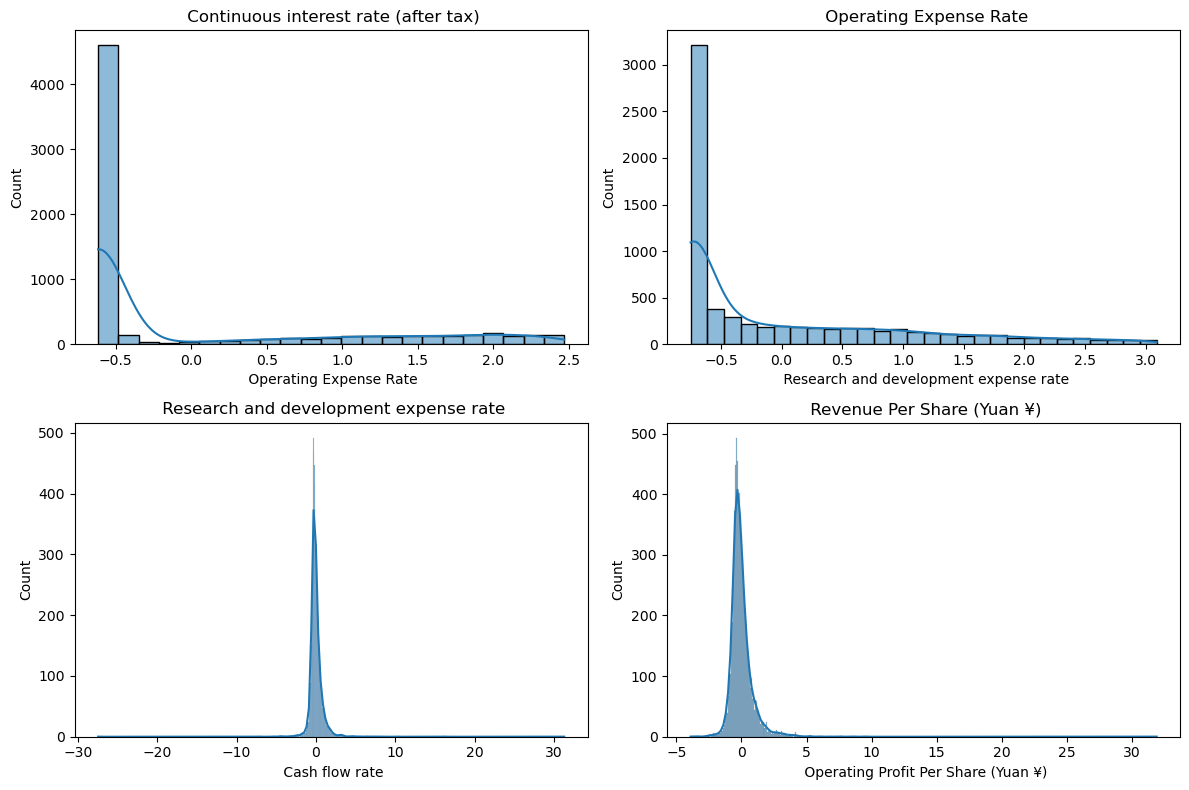

In [19]:
columns_to_check = [10, 11, 12, 21]  # Example column numbers, adjust as needed

# Plot histograms for the specified columns
plt.figure(figsize=(12, 8))
for i, col_num in enumerate(columns_to_check, start=1):
    plt.subplot(2, 2, i)
    column_name = df.columns[col_num]
    sns.histplot(X_scaled_df.iloc[:, col_num], kde=True)
    plt.title(column_name)
plt.tight_layout()
plt.show()

In [19]:
combined_Scaled_df = pd.concat([X_scaled_df, y], axis=1)


In [20]:
# Iterate over the columns and print their index and name
for i, column_name in enumerate(X_scaled_df.columns):
    print(f"Column {i}: {column_name}")


Column 0:  ROA(C) before interest and depreciation before interest
Column 1:  ROA(A) before interest and % after tax
Column 2:  ROA(B) before interest and depreciation after tax
Column 3:  Operating Gross Margin
Column 4:  Realized Sales Gross Margin
Column 5:  Operating Profit Rate
Column 6:  Pre-tax net Interest Rate
Column 7:  After-tax net Interest Rate
Column 8:  Non-industry income and expenditure/revenue
Column 9:  Continuous interest rate (after tax)
Column 10:  Operating Expense Rate
Column 11:  Research and development expense rate
Column 12:  Cash flow rate
Column 13:  Interest-bearing debt interest rate
Column 14:  Tax rate (A)
Column 15:  Net Value Per Share (B)
Column 16:  Net Value Per Share (A)
Column 17:  Net Value Per Share (C)
Column 18:  Persistent EPS in the Last Four Seasons
Column 19:  Cash Flow Per Share
Column 20:  Revenue Per Share (Yuan ¥)
Column 21:  Operating Profit Per Share (Yuan ¥)
Column 22:  Per Share Net profit before tax (Yuan ¥)
Column 23:  Realized

<H3>Undersampling to the values of Minority Class of Bankruptcy

In [21]:
import pandas as pd
from sklearn.utils import resample

# Assuming combined_Scaled_df is your DataFrame with the target variable as the last column

# Identify the minority and majority classes
minority_class = combined_Scaled_df[combined_Scaled_df.iloc[:, -1] == 1]
majority_class = combined_Scaled_df[combined_Scaled_df.iloc[:, -1] == 0]

# Determine the number of samples in the minority class
minority_count = len(minority_class)

# Undersample the majority class to match the number of samples in the minority class
majority_undersampled = resample(majority_class, replace=False, n_samples=minority_count, random_state=42)

# Combine the undersampled majority class with the minority class
balanced_df = pd.concat([minority_class, majority_undersampled])

# Now balanced_df contains a balanced dataset with an equal number of samples for both classes


In [ ]:
y

result of standard scaled and no undersampling --> combined_scaled_df     X_scaled_df, y_combined <BR>
result of std scaled and undersampling --> balanced df    X_balanced    y_balanced

In [22]:
# Extract the last column as y
y_balanced = balanced_df.iloc[:, -1]

# Extract the rest of the columns as X
X_balanced = balanced_df.iloc[:, :-1]

# Print the shapes of X and y
print("Shape of X:", X_balanced.shape)
print("Shape of y:", y_balanced.shape)


Shape of X: (440, 94)
Shape of y: (440,)


<h4>this checks for counts no use in the code functionality

In [23]:
# Filter combined_df where the first column equals 1
filtered_df = balanced_df[balanced_df.iloc[:, -1] == 1]

# Print the values of filtered_df
print("Values of combined_df where the first column is 1:")
print(filtered_df)


Values of combined_df where the first column is 1:
       ROA(C) before interest and depreciation before interest  \
0                                             -2.217909          
1                                             -0.673828          
2                                             -1.303672          
3                                             -1.735886          
4                                             -0.661778          
...                                                 ...          
6591                                          -1.428195          
6640                                          -5.081931          
6641                                          -2.760989          
6642                                          -2.721624          
6728                                          -0.214299          

       ROA(A) before interest and % after tax  \
0                                   -2.045798   
1                                   -0.311068   
2        

In [24]:
# Iterate over each column and print min and max values
for column in balanced_df.columns:
    min_val = balanced_df[column].min()
    max_val = balanced_df[column].max()
    print(f"Column: {column}, Min: {min_val}, Max: {max_val}")


Column:  ROA(C) before interest and depreciation before interest, Min: -7.925064667025493, Max: 4.111055969354875
Column:  ROA(A) before interest and % after tax, Min: -8.513648538548646, Max: 6.033823117915872
Column:  ROA(B) before interest and depreciation after tax, Min: -8.444108885195531, Max: 4.16753184591837
Column:  Operating Gross Margin, Min: -6.220246600563228, Max: 3.3782702180401154
Column:  Realized Sales Gross Margin, Min: -6.225672927334692, Max: 3.382911336753516
Column:  Operating Profit Rate, Min: -0.5278717233824465, Max: 0.06142567798324163
Column:  Pre-tax net Interest Rate, Min: -3.1064400821453133, Max: 0.6566697909051765
Column:  After-tax net Interest Rate, Min: -3.4951813286909843, Max: 0.58801589576704
Column:  Non-industry income and expenditure/revenue, Min: -6.139531880916111, Max: 1.6062684086964434
Column:  Continuous interest rate (after tax), Min: -3.0507299317252627, Max: 0.6598545824163325
Column:  Operating Expense Rate, Min: -0.6163336830537162, 

In [25]:
from sklearn.decomposition import PCA

# Assuming your original dataset is stored in a DataFrame named 'original_df'

# Separate the features (X) and target variable (y)
X = X_balanced  # Assuming 'X_balanced' contains your feature matrix
y = y_balanced  # Assuming 'y_balanced' contains your target variable

# Perform PCA
n_components = 50
pca = PCA(n_components=n_components)
pca.fit(X)

# Get the selected features by PCA
selected_features = []
for i in range(n_components):
    principal_component = pca.components_[i]
    selected_feature_indices = [j for j, coef in enumerate(principal_component) if abs(coef) > 0.53]
    selected_features.extend(selected_feature_indices)

# Remove duplicates and sort the indices
selected_features = sorted(set(selected_features))

# Get the names of selected features
selected_feature_names = X.columns[selected_features]

# Print the list of selected features
print("Selected Features by PCA:")
print(selected_feature_names)
print(len(selected_feature_names))


Selected Features by PCA:
Index([' Operating Expense Rate', ' Interest-bearing debt interest rate',
       ' Tax rate (A)', ' Net Value Growth Rate', ' Quick Ratio',
       ' Interest Expense Ratio', ' Accounts Receivable Turnover',
       ' Average Collection Days', ' Revenue per person',
       ' Operating profit per person', ' Quick Assets/Total Assets',
       ' Cash/Current Liability', ' Cash Turnover Rate',
       ' Fixed Assets to Assets', ' Cash Flow to Equity',
       ' Total assets to GNP price', ' No-credit Interval'],
      dtype='object')
17


In [26]:
# List of column names to select
selected_columns = [' Operating Expense Rate', ' Interest-bearing debt interest rate',
                    ' Tax rate (A)', ' Net Value Growth Rate', ' Quick Ratio',
                    ' Interest Expense Ratio', ' Accounts Receivable Turnover',
                    ' Average Collection Days', ' Revenue per person',
                    ' Operating profit per person', ' Quick Assets/Total Assets',
                    ' Cash/Current Liability', ' Cash Turnover Rate',
                    ' Fixed Assets to Assets', ' Cash Flow to Equity',
                    ' Total assets to GNP price', ' No-credit Interval']

# Select the columns from X_balanced and store in X_pcaFeatures
X_pcaFeatures = X_balanced[selected_columns].copy()

# Display the first few rows of X_pcaFeatures
print(X_pcaFeatures.head())


    Operating Expense Rate   Interest-bearing debt interest rate  \
0                -0.616334                             -0.151921   
1                -0.616334                             -0.151921   
2                -0.616334                             -0.151921   
3                -0.616334                             -0.151921   
4                 1.820772                             -0.151921   

    Tax rate (A)   Net Value Growth Rate   Quick Ratio  \
0      -0.829388               -0.013721     -0.034237   
1      -0.829388               -0.013721     -0.034237   
2      -0.829388               -0.013721     -0.034237   
3      -0.829388               -0.013721     -0.034237   
4      -0.829388               -0.013721     -0.034237   

    Interest Expense Ratio   Accounts Receivable Turnover  \
0                -0.092520                      -0.045967   
1                 0.372093                      -0.045967   
2                -0.120983                      -0.045967  

In [27]:
X_pcaFeatures

Operating Expense Rate   Interest-bearing debt interest rate  \
0                   -0.616334                             -0.151921   
1                   -0.616334                             -0.151921   
2                   -0.616334                             -0.151921   
3                   -0.616334                             -0.151921   
4                    1.820772                             -0.151921   
...                       ...                                   ...   
5690                 1.706485                             -0.151921   
2564                -0.616334                             -0.151921   
4914                -0.616334                             -0.151921   
6596                -0.616334                             -0.151921   
499                  0.230012                             -0.151921   

       Tax rate (A)   Net Value Growth Rate   Quick Ratio  \
0         -0.829388               -0.013721     -0.034237   
1         -0.829388               -0.013721     -0.034237   
2         -0.829388               -0.013721     -0.034237   
3         -0.829388               -0.013721     -0.034237   
4         -0.829388               -0.013721     -0.034237   
...             ...                     ...           ...   
5690       0.933648               -0.013721     -0.034237   
2564       0.395612               -0.013721     -0.034237   
4914      -0.322743               -0.013721     -0.034237   
6596      -0.328584               -0.013721     -0.034237   
499        0.788371               -0.013721     -0.034237   

       Interest Expense Ratio   Accounts Receivable Turnover  \
0                   -0.092520                      -0.045967   
1                    0.372093                      -0.045967   
2                   -0.120983                      -0.045967   
3                   -0.067866                      -0.045967   
4                    0.450626                      -0.045967   
...                       ...                            ...   
5690                 0.012952                      -0.045967   
2564                -0.023770                      -0.045967   
4914                -0.027457                      -0.045967   
6596                -0.029225                      -0.045967   
499                  0.072621                      -0.045967   

       Average Collection Days   Revenue per person  \
0                    -0.038333            -0.017024   
1                    -0.038333            -0.017024   
2                    -0.038333            -0.017024   
3                    -0.038333            -0.017024   
4                    -0.038333            -0.017024   
...                        ...                  ...   
5690                 -0.038333            -0.017024   
2564                 -0.038333            -0.017024   
4914                 -0.038333            -0.017024   
6596                 -0.038333            -0.017024   
499                  -0.038333            -0.017024   

       Operating profit per person   Quick Assets/Total Assets  \
0                        -0.237123                   -1.155833   
1                        -0.277557                   -1.351081   
2                        -0.571652                   -0.296712   
3                        -0.677748                   -1.181075   
4                        -0.192543                   -0.692146   
...                            ...                         ...   
5690                     -0.081609                    0.238841   
2564                     -0.083683                   -1.508800   
4914                     -0.076425                   -0.481981   
6596                     -0.128609                    1.237624   
499                      -0.161785                   -0.822300   

       Cash/Current Liability   Cash Turnover Rate   Fixed Assets to Assets  \
0                   -0.072818            -0.685397                -0.012111   
1                   -0.072818           

In [28]:
combined_PCA_df = pd.concat([X_pcaFeatures, y_balanced], axis=1)


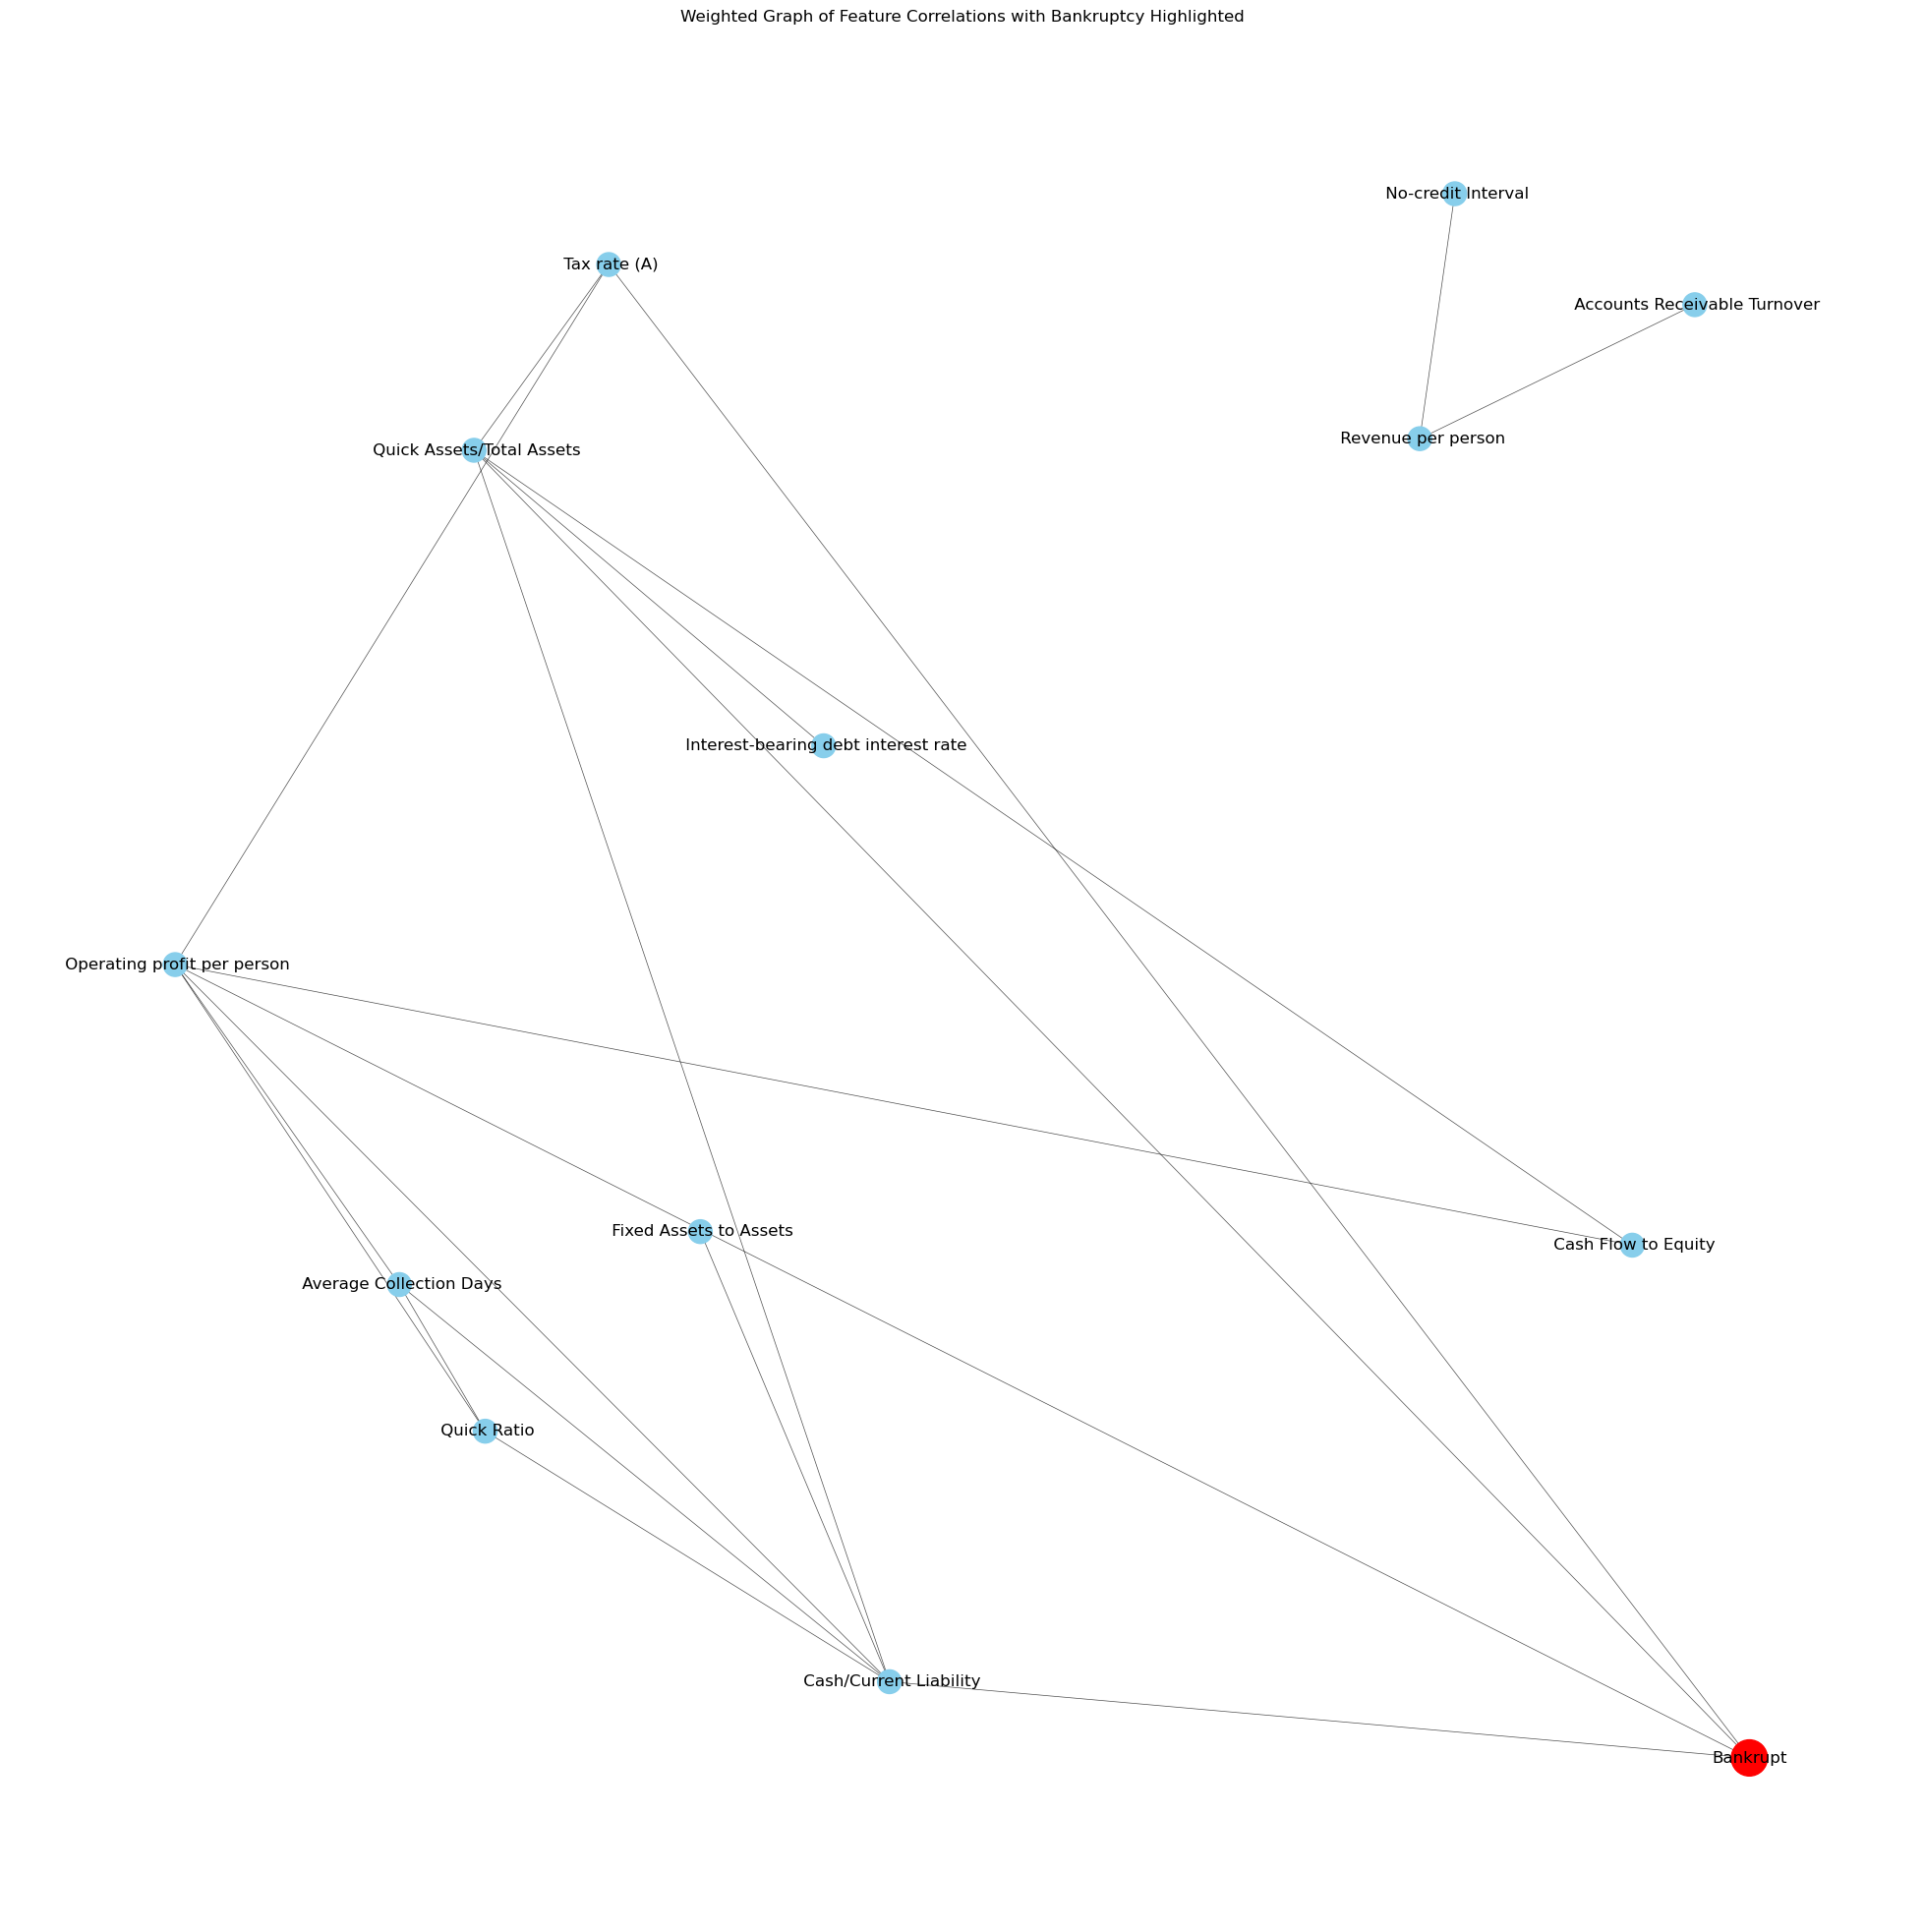

In [29]:
import networkx as nx

correlation_matrix = combined_PCA_df.corr()

# Create a graph
G = nx.Graph()

# Add nodes (features) and edges with weights
for i, feature1 in enumerate(correlation_matrix.columns):
    for j, feature2 in enumerate(correlation_matrix.columns):
        if i < j and abs(correlation_matrix.iloc[i, j]) > 0.1:  # Adjust the threshold as needed
            G.add_edge(feature1, feature2, weight=correlation_matrix.iloc[i, j])

# Set node colors and sizes
node_colors = ['red' if node == 'Bankrupt' else 'skyblue' for node in G]
node_sizes = [700 if node == 'Bankrupt' else 300 for node in G]

# Position nodes using spring layout
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Draw the graph
plt.figure(figsize=(25, 25))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.7)

# Show the plot
plt.title("Weighted Graph of Feature Correlations with Bankruptcy Highlighted")
plt.axis('off')  # Hide the axes
plt.show()


In [30]:
combined_PCA_df

Operating Expense Rate   Interest-bearing debt interest rate  \
0                   -0.616334                             -0.151921   
1                   -0.616334                             -0.151921   
2                   -0.616334                             -0.151921   
3                   -0.616334                             -0.151921   
4                    1.820772                             -0.151921   
...                       ...                                   ...   
5690                 1.706485                             -0.151921   
2564                -0.616334                             -0.151921   
4914                -0.616334                             -0.151921   
6596                -0.616334                             -0.151921   
499                  0.230012                             -0.151921   

       Tax rate (A)   Net Value Growth Rate   Quick Ratio  \
0         -0.829388               -0.013721     -0.034237   
1         -0.829388               -0.013721     -0.034237   
2         -0.829388               -0.013721     -0.034237   
3         -0.829388               -0.013721     -0.034237   
4         -0.829388               -0.013721     -0.034237   
...             ...                     ...           ...   
5690       0.933648               -0.013721     -0.034237   
2564       0.395612               -0.013721     -0.034237   
4914      -0.322743               -0.013721     -0.034237   
6596      -0.328584               -0.013721     -0.034237   
499        0.788371               -0.013721     -0.034237   

       Interest Expense Ratio   Accounts Receivable Turnover  \
0                   -0.092520                      -0.045967   
1                    0.372093                      -0.045967   
2                   -0.120983                      -0.045967   
3                   -0.067866                      -0.045967   
4                    0.450626                      -0.045967   
...                       ...                            ...   
5690                 0.012952                      -0.045967   
2564                -0.023770                      -0.045967   
4914                -0.027457                      -0.045967   
6596                -0.029225                      -0.045967   
499                  0.072621                      -0.045967   

       Average Collection Days   Revenue per person  \
0                    -0.038333            -0.017024   
1                    -0.038333            -0.017024   
2                    -0.038333            -0.017024   
3                    -0.038333            -0.017024   
4                    -0.038333            -0.017024   
...                        ...                  ...   
5690                 -0.038333            -0.017024   
2564                 -0.038333            -0.017024   
4914                 -0.038333            -0.017024   
6596                 -0.038333            -0.017024   
499                  -0.038333            -0.017024   

       Operating profit per person   Quick Assets/Total Assets  \
0                        -0.237123                   -1.155833   
1                        -0.277557                   -1.351081   
2                        -0.571652                   -0.296712   
3                        -0.677748                   -1.181075   
4                        -0.192543                   -0.692146   
...                            ...                         ...   
5690                     -0.081609                    0.238841   
2564                     -0.083683                   -1.508800   
4914                     -0.076425                   -0.481981   
6596                     -0.128609                    1.237624   
499                      -0.161785                   -0.822300   

       Cash/Current Liability   Cash Turnover Rate   Fixed Assets to Assets  \
0                   -0.072818            -0.685397                -0.012111   
1                   -0.072818           

In [31]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

# Define the LassoCV model with cross-validation
lasso_cv = LassoCV(cv=5)

# Fit the LassoCV model on your data
lasso_cv.fit(X_pcaFeatures, y_balanced)

# Create a SelectFromModel object using the fitted LassoCV model
selector = SelectFromModel(lasso_cv, threshold=0.001)

# Fit the selector to your data and transform it to select features
X_selected = selector.fit_transform(X_balanced, y_balanced)

# Get the selected features
selected_features = X_balanced.columns[selector.get_support()]
print("Selected features:")
print(selected_features)


/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.039258850579294347, tolerance: 0.00825
  model = cd_fast.enet_coordinate_descent_gram(
/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04932728340001091, tolerance: 0.00825
  model = cd_fast.enet_coordinate_descent_gram(
/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08579256333732843, tolerance: 0.00825
  model = cd_fast.enet_coordinate_descent_gram(
/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/sklearn/linear

Selected features:
Index([' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Persistent EPS in the Last Four Seasons',
       ' Total Asset Growth Rate', ' Cash Reinvestment %',
       ' Total debt/Total net worth', ' Debt ratio %', ' Total Asset Turnover',
       ' Average Collection Days', ' Fixed Assets Turnover Frequency',
       ' Operating profit per person', ' Working Capital to Total Assets',
       ' Cash/Current Liability', ' Current Liability to Assets',
       ' Current Liabilities/Equity', ' Total expense/Assets',
       ' Current Liability to Equity', ' Cash Flow to Equity',
       ' Current Liability to Current Assets', ' Liability-Assets Flag',
       ' Net Income to Stockholder's Equity'],
      dtype='object')


/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.44852794232437887, tolerance: 0.00825
  model = cd_fast.enet_coordinate_descent_gram(
/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.49708354543345123, tolerance: 0.00825
  model = cd_fast.enet_coordinate_descent_gram(
/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4732048522541774, tolerance: 0.00825
  model = cd_fast.enet_coordinate_descent_gram(
/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/sklearn/linear_m

In [32]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Define stability selection parameters
n_subsamples = 100  # Number of subsamples
alphas = np.linspace(0.01, 6, num=10)  # Range of alpha values
selection_threshold = 0.7  # Increased selection threshold for feature stability

metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': []
}

for alpha in alphas:
    print(f"Alpha: {alpha}")
    
    # Initialize an empty array to store coefficients
    coefficients_all = []

    # Perform 'stability selection'
    for _ in range(n_subsamples):
        # Randomly sample indices for subsample
        subsample_indices = np.random.choice(X_pcaFeatures.shape[0], size=int(X_pcaFeatures.shape[0] * 0.8), replace=False)
        X_subsample = X_pcaFeatures.iloc[subsample_indices, :]
        y_subsample = y_balanced.iloc[subsample_indices]

        # Apply logistic regression with L2 regularization on subsample
        model = LogisticRegressionCV(Cs=[1/alpha], solver='liblinear', penalty='l2', cv=5, max_iter=1000)
        model.fit(X_subsample, y_subsample)

        # Store coefficients
        coefficients_all.append(model.coef_.flatten())

    # Convert list of arrays into a 2D numpy array
    coefficients_all = np.array(coefficients_all)
    
    # Calculate coefficient stability
    coef_stability = np.var(coefficients_all, axis=0)
    
    # Select features based on stability threshold
    stable_features_indices = np.where(coef_stability >= np.quantile(coef_stability, selection_threshold))[0]
    stable_features = X_pcaFeatures.columns[stable_features_indices]

    # Print stable features
    print("Stable features based on L2 regularization:")
    print(stable_features)
    print()

    # Calculate number of selected features
    n_selected_features = len(stable_features)
    print(f"Number of selected features: {n_selected_features}")
    print()

    # Predict and evaluate using the model on the full dataset
    y_pred = model.predict(X_pcaFeatures)
    
    # Calculate metrics
    accuracy = accuracy_score(y_balanced, y_pred)
    precision = precision_score(y_balanced, y_pred, average='macro')
    recall = recall_score(y_balanced, y_pred, average='macro')
    f1 = f1_score(y_balanced, y_pred, average='macro')

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print()

    # Save metrics
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1'].append(f1)

# If needed, convert metrics to a DataFrame or similar for analysis
metrics_df = pd.DataFrame(metrics, index=alphas)
print(metrics_df)


Alpha: 0.01
Stable features based on L2 regularization:
Index([' Interest-bearing debt interest rate', ' Quick Ratio',
       ' Average Collection Days', ' Cash/Current Liability',
       ' No-credit Interval'],
      dtype='object')

Number of selected features: 5

Accuracy: 0.7727272727272727
Precision: 0.7735411140583555
Recall: 0.7727272727272727
F1 Score: 0.7725581010669093

Alpha: 0.6755555555555556
Stable features based on L2 regularization:
Index([' Tax rate (A)', ' Interest Expense Ratio',
       ' Accounts Receivable Turnover', ' Operating profit per person',
       ' No-credit Interval'],
      dtype='object')

Number of selected features: 5

Accuracy: 0.7613636363636364
Precision: 0.7642518434960623
Recall: 0.7613636363636364
F1 Score: 0.7607097906987585

Alpha: 1.3411111111111111
Stable features based on L2 regularization:
Index([' Tax rate (A)', ' Interest Expense Ratio',
       ' Accounts Receivable Turnover', ' Operating profit per person',
       ' No-credit Interval']

In [33]:
# Select the specified columns
selected_columns = [' Tax rate (A)', ' Interest Expense Ratio', ' Accounts Receivable Turnover', ' Operating profit per person', ' No-credit Interval']
X_StableFeatures = X_pcaFeatures[selected_columns].copy()

# Print the new DataFrame
print(X_StableFeatures)


       Tax rate (A)   Interest Expense Ratio   Accounts Receivable Turnover  \
0         -0.829388                -0.092520                      -0.045967   
1         -0.829388                 0.372093                      -0.045967   
2         -0.829388                -0.120983                      -0.045967   
3         -0.829388                -0.067866                      -0.045967   
4         -0.829388                 0.450626                      -0.045967   
...             ...                      ...                            ...   
5690       0.933648                 0.012952                      -0.045967   
2564       0.395612                -0.023770                      -0.045967   
4914      -0.322743                -0.027457                      -0.045967   
6596      -0.328584                -0.029225                      -0.045967   
499        0.788371                 0.072621                      -0.045967   

       Operating profit per person   No-credit Inte

In [34]:
combined_StableFeatures_df = pd.concat([X_StableFeatures, y_balanced], axis=1)


In [35]:
combined_StableFeatures_df

Tax rate (A)   Interest Expense Ratio   Accounts Receivable Turnover  \
0         -0.829388                -0.092520                      -0.045967   
1         -0.829388                 0.372093                      -0.045967   
2         -0.829388                -0.120983                      -0.045967   
3         -0.829388                -0.067866                      -0.045967   
4         -0.829388                 0.450626                      -0.045967   
...             ...                      ...                            ...   
5690       0.933648                 0.012952                      -0.045967   
2564       0.395612                -0.023770                      -0.045967   
4914      -0.322743                -0.027457                      -0.045967   
6596      -0.328584                -0.029225                      -0.045967   
499        0.788371                 0.072621                      -0.045967   

       Operating profit per person   No-credit Interval  Bankrupt  
0                        -0.237123            -0.084274         1  
1                        -0.277557            -0.021388         1  
2                        -0.571652            -0.005984         1  
3                        -0.677748            -0.080226         1  
4                        -0.192543            -0.032052         1  
...                            ...                  ...       ...  
5690                     -0.081609            -0.005678         0  
2564                     -0.083683            -0.018824         0  
4914                     -0.076425            -0.121733         0  
6596                     -0.128609             0.004597         0  
499                      -0.161785             0.189935         0  

[440 rows x 6 columns]

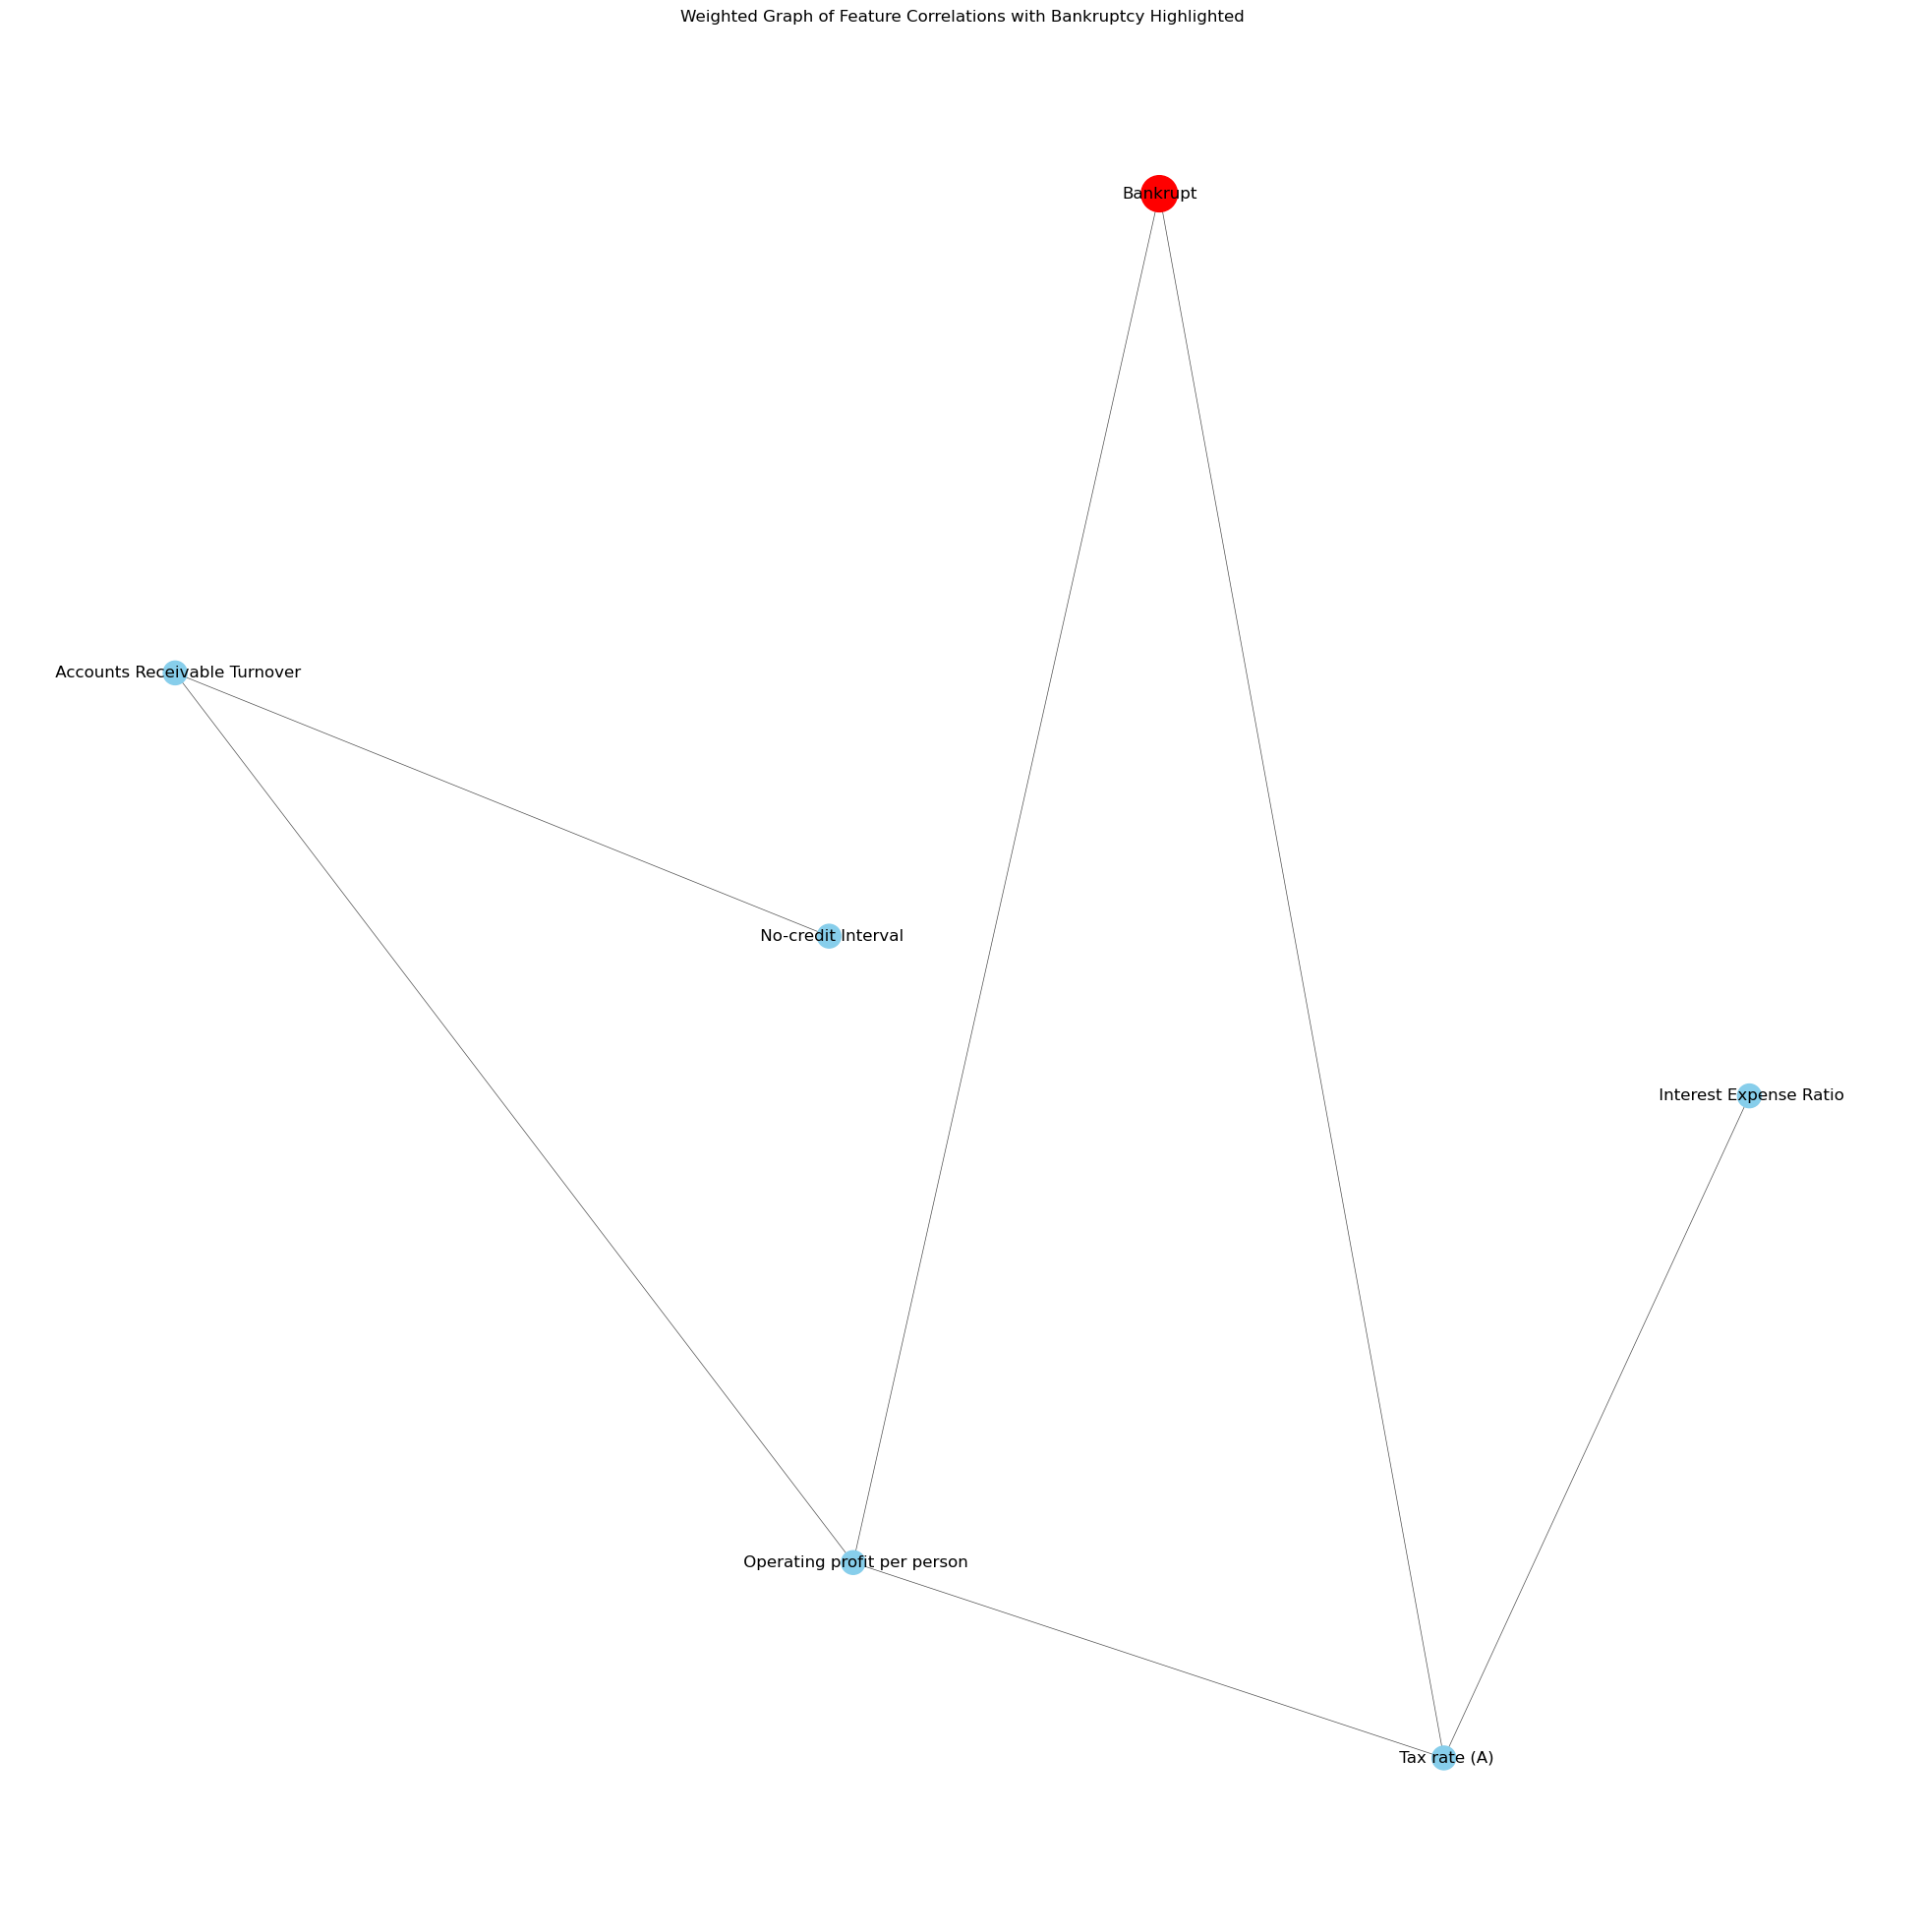

In [36]:
import networkx as nx

correlation_matrix = combined_StableFeatures_df.corr()

# Create a graph
G = nx.Graph()

# Add nodes (features) and edges with weights
for i, feature1 in enumerate(correlation_matrix.columns):
    for j, feature2 in enumerate(correlation_matrix.columns):
        if i < j and abs(correlation_matrix.iloc[i, j]) > 0.05:  # Adjust the threshold as needed
            G.add_edge(feature1, feature2, weight=correlation_matrix.iloc[i, j])

# Set node colors and sizes
node_colors = ['red' if node == 'Bankrupt' else 'skyblue' for node in G]
node_sizes = [700 if node == 'Bankrupt' else 300 for node in G]

# Position nodes using spring layout
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Draw the graph
plt.figure(figsize=(25, 25))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.7)

# Show the plot
plt.title("Weighted Graph of Feature Correlations with Bankruptcy Highlighted")
plt.axis('off')  # Hide the axes
plt.show()


<H1>Applying Logistic Regression

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Define the hyperparameters grid
param_grid = {
    'penalty': ['l1', 'l2'],  # regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # inverse of regularization strength
    'solver': ['liblinear', 'saga']  # optimization algorithm
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=100000), param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a logistic regression model with the best hyperparameters
best_model = LogisticRegression(**best_params, max_iter=100000)
best_model.fit(X_train, y_train)

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.7613636363636364
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.59      0.68        37
           1       0.75      0.88      0.81        51

    accuracy                           0.76        88
   macro avg       0.77      0.74      0.74        88
weighted avg       0.77      0.76      0.75        88



<H1> Applying Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_StableFeatures, y_balanced, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.7954545454545454
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        37
           1       0.84      0.80      0.82        51

    accuracy                           0.80        88
   macro avg       0.79      0.79      0.79        88
weighted avg       0.80      0.80      0.80        88



In [43]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a Random Forest Classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8181818181818182
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        37
           1       0.82      0.88      0.85        51

    accuracy                           0.82        88
   macro avg       0.82      0.81      0.81        88
weighted avg       0.82      0.82      0.82        88



<h1>Implementing Gradient Boosting Machines

In [44]:
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, auc
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Classifier
gbm_classifier = GradientBoostingClassifier(random_state=42)
gbm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gbm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Calculate AUC-PR
auc_pr = auc(recall, precision)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
print("AUC-PR:", auc_pr)

Accuracy: 0.875
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        37
           1       0.88      0.90      0.89        51

    accuracy                           0.88        88
   macro avg       0.87      0.87      0.87        88
weighted avg       0.87      0.88      0.87        88

AUC-PR: 0.9216971753736459


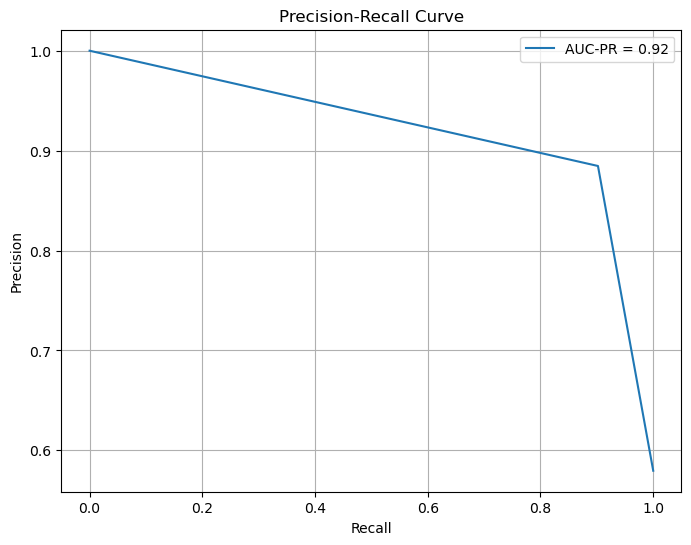

In [45]:
import matplotlib.pyplot as plt

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [125]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

# Initialize and train the Gradient Boosting Classifier with the best hyperparameters
best_gbm_classifier = GradientBoostingClassifier(random_state=42, **best_params)
best_gbm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = best_gbm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.8409090909090909
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        37
           1       0.89      0.82      0.86        51

    accuracy                           0.84        88
   macro avg       0.84      0.84      0.84        88
weighted avg       0.85      0.84      0.84        88

